<a href="https://colab.research.google.com/github/TheClockworkk/ML-Labs-Homeworks/blob/main/lab7_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [241]:
import math
import copy
import numpy as np
import random
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
from PIL import Image

In [242]:
def pareto(x):
    '''Распределение Парето

    Arsg:
      alpha - математическое ожидание
      k - дисперсия

    Return:
      Выводит случайное число в этом распределении
    '''
    
    alpha=1
    k=2
    return (k * alpha**k) / (x**(k+1))

In [243]:
def laplace(x):

    '''Распределение Лапласа

    Args:
      alpha - математическое ожидание
      k - дисперсия

    Return:
      выводит случайное число в этом распределении
    '''
    
    alpha=0.7
    k=3
    return (alpha/2)*math.e**(-alpha*abs(x-k))

In [244]:
def Rej_samp(n,f,a,b,c):

    '''Реализация Rejection Sampling

    Args:
      N - число точек
      f - функция
      a - Начало отрезка
      b - Конец отрезка
      c - высота

    Return:
      Координаты двух множеств точек, попадающих во множество и вне его соотвественно
    '''

    in_x=[]
    in_y=[]
    out_x=[]
    out_y=[]
    while len(in_x) < n:
        x = np.random.rand() * (b-a) + a
        y = np.random.rand() * c
        if y < f(x):
            in_x.append(x)
            in_y.append(y)
        else:
            out_x.append(x)
            out_y.append(y)
    return in_x, in_y, out_x, out_y

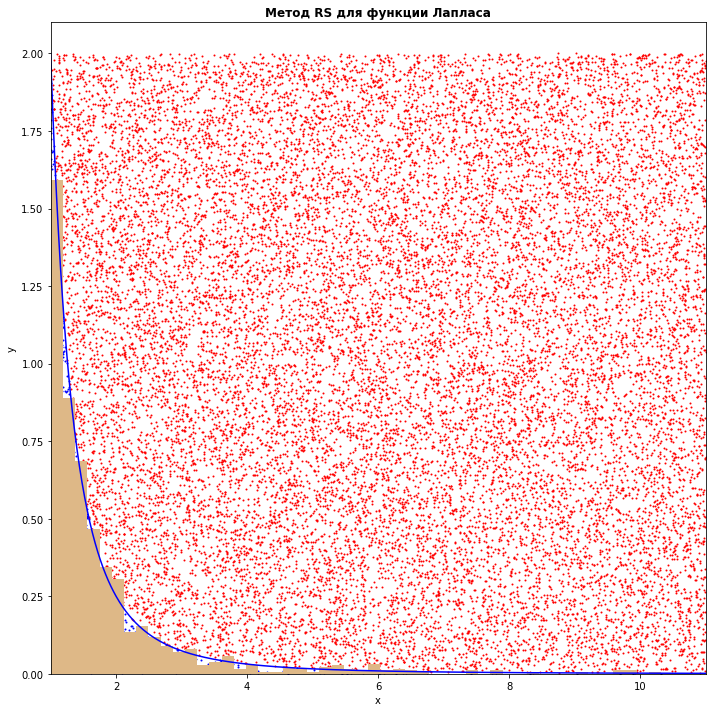

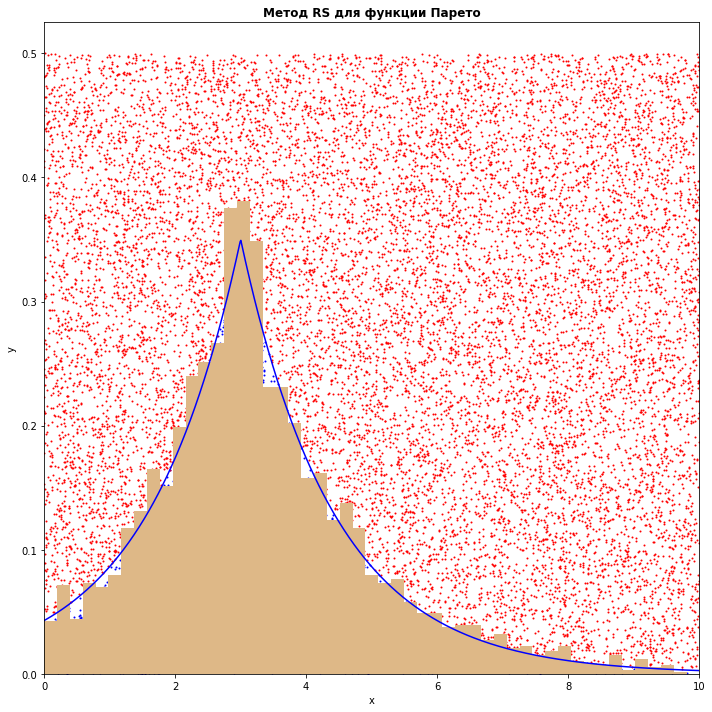

In [245]:
grid_points = 1000
min, max = 1, 11
x = np.linspace(min, max, grid_points)
y = pareto(x)

in_x, in_y, out_x, out_y = Rej_samp(1000, pareto, min, max, 2)

fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(in_x, 50, density=True, color="burlywood")
ax.plot(x, y, color="blue")
ax.scatter(in_x, in_y, s=1,color = "blue")
ax.scatter(out_x, out_y, s=1, color = "red")

ax.set_xlim((min, max))
ax.set_title('Метод RS для функции Лапласа', fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.tight_layout()

plt.show()

min, max = 0, 10
x = np.linspace(min, max, grid_points)
y = laplace(x)

in_x, in_y, out_x, out_y = Rej_samp(3000, laplace, min, max, 0.5)

fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(in_x, 50, density=True, color="burlywood")
ax.plot(x, y, color="blue")
ax.scatter(in_x, in_y, s=1,color = "blue") 
ax.scatter(out_x, out_y, s=1, color = "red")

ax.set_xlim((min, max))
ax.set_title('Метод RS для функции Парето', fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.tight_layout()

plt.show()


In [246]:
def metropolis_hastings(n,f,x0):

    '''Реализация Metropolis Hastings

    Args:
      N - число точек
      f - функция
      x0 - начальная точка

    Return: 
      Число точек на координату
    '''

    x=[x0]

    while len(x) < n:
        x_prev = x[-1]
        x_next = np.random.normal(x_prev)
        ratio = f(x_next)/f(x_prev)

        if np.random.rand() < ratio:
            x.append(x_next)
        else:
            x.append(x_prev)
            
    return x

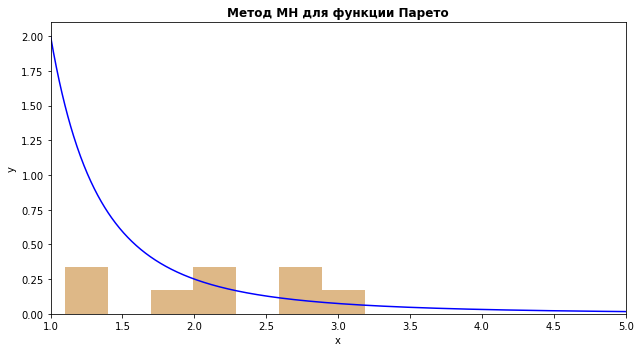

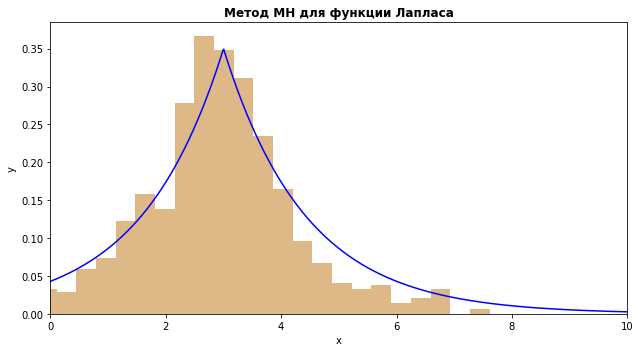

In [267]:
min, max = 1, 5

# Парето
x = np.linspace(min, max, grid_points)
y = pareto(x)

MH_x = metropolis_hastings(20, pareto, 2)

fig, ax = plt.subplots(figsize=(9,5))
ax.hist(MH_x, 10, density=True, color="burlywood")
ax.plot(x, y, color="blue") 

ax.set_xlim((min, max))

ax.set_title('Метод MH для функции Парето', fontweight='bold')

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.tight_layout()
plt.show()

# Лапласа
min, max = 0, 10
x = np.linspace(min, max, grid_points)
y = laplace(x)

MH_x = metropolis_hastings(1000, laplace, 1)

fig, ax = plt.subplots(figsize=(9,5))
ax.hist(MH_x, 50, density=True, color="burlywood")
ax.plot(x, y, color="blue")

ax.set_xlim((min, max))

ax.set_title('Метод MH для функции Лапласа', fontweight='bold')

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.tight_layout()
plt.show()